In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
'''for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))'''

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

"for dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))"

In [2]:
df = pd.read_csv('/kaggle/input/az-handwritten-alphabets-in-csv-format/A_Z Handwritten Data.csv')

In [3]:
df

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372446,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372447,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372448,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.shape

(372450, 785)

In [5]:
df.columns

Index(['0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9',
       ...
       '0.639', '0.640', '0.641', '0.642', '0.643', '0.644', '0.645', '0.646',
       '0.647', '0.648'],
      dtype='object', length=785)

In [6]:
X = df.drop('0',axis=1)
y = df['0']

In [7]:
X.shape

(372450, 784)

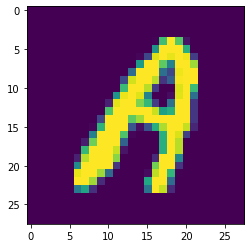

In [8]:
img = X.iloc[0].values.reshape(28,28)
plt.imshow(img)

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [10]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [11]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

y_train_cat = to_categorical(y_train,num_classes=26)
y_test_cat = to_categorical(y_test,num_classes=26)

2023-02-06 05:46:06.889474: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2023-02-06 05:46:06.890424: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [12]:
model = Sequential()
model.add(Dense(56, activation='relu', input_shape=(784,)))
model.add(Dense(36, activation='relu'))
model.add(Dense(26, activation='softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

2023-02-06 05:46:13.258877: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-02-06 05:46:13.264442: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2023-02-06 05:46:13.264532: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2023-02-06 05:46:13.264620: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (519d197c7fa0): /proc/driver/nvidia/version does not exist
2023-02-06 05:46:13.267648: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operation

In [13]:
hist=model.fit(X_train_scaled,y_train_cat,epochs=10)

2023-02-06 05:46:14.696389: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1868805120 exceeds 10% of free system memory.
2023-02-06 05:46:17.261457: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2023-02-06 05:46:17.275565: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2249995000 Hz


Epoch 1/10
9312/9312 [==============================] - 15s 2ms/step - loss: 0.5850 - accuracy: 0.8420
Epoch 2/10
9312/9312 [==============================] - 14s 2ms/step - loss: 0.2035 - accuracy: 0.9448
Epoch 3/10
9312/9312 [==============================] - 15s 2ms/step - loss: 0.1717 - accuracy: 0.9544
Epoch 4/10
9312/9312 [==============================] - 16s 2ms/step - loss: 0.1635 - accuracy: 0.9583
Epoch 5/10
9312/9312 [==============================] - 15s 2ms/step - loss: 0.1618 - accuracy: 0.9602
Epoch 6/10
9312/9312 [==============================] - 15s 2ms/step - loss: 0.1622 - accuracy: 0.9606
Epoch 7/10
9312/9312 [==============================] - 15s 2ms/step - loss: 0.1649 - accuracy: 0.9610
Epoch 8/10
9312/9312 [==============================] - 15s 2ms/step - loss: 0.1701 - accuracy: 0.9602
Epoch 9/10
9312/9312 [==============================] - 14s 2ms/step - loss: 0.1804 - accuracy: 0.9587
Epoch 10/10
9312/9312 [==============================] - 14s 2ms/step - l

In [14]:
# # plt.plot(hist_1.history['loss'], label='Batch GD')
# # plt.plot(hist_2.history['loss'], label='Mini-Batch GD')
# plt.plot(hist_3.history['loss'], label='Stochastic GD')
# plt.legend()

In [15]:
model.evaluate(X_test_scaled,y_test_cat)

2328/2328 [==============================] - 3s 1ms/step - loss: 0.2416 - accuracy: 0.9494


[0.24161291122436523, 0.9494428634643555]

In [16]:
model.predict(X_test_scaled.iloc[:10,:]).argmax(axis=1)

array([24, 14,  4, 18, 17, 14, 18, 19, 12, 13])